<a href="https://colab.research.google.com/github/NazaninSaadatMoghaddam1993/Housing_kaggle/blob/main/Housing_regression_kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/house-prices-advanced-regression-techniques

/content/drive/MyDrive/house-prices-advanced-regression-techniques


In [3]:
ls

data_description.txt   submission.csv  train.csv
sample_submission.csv  test.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [5]:
train_data = pd.read_csv('train.csv')


In [6]:
train_data.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [7]:
nan_attrebutes = ['PoolQC','Fence','MiscFeature','Alley','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu']
train_data[nan_attrebutes]=train_data[nan_attrebutes].fillna('No_found')

In [8]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train_data['year_b_s'] = train_data['YearBuilt']-train_data['YrSold']

In [10]:
train_data = train_data.drop(columns=['YearBuilt','YrSold'])

In [11]:
df_num = train_data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,year_b_s
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,208500,-5
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,181500,-31
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,223500,-7
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,140000,-91
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,250000,-8


In [12]:
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

<ipython-input-12-e8ce0b465032>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
year_b_s         0.523350
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

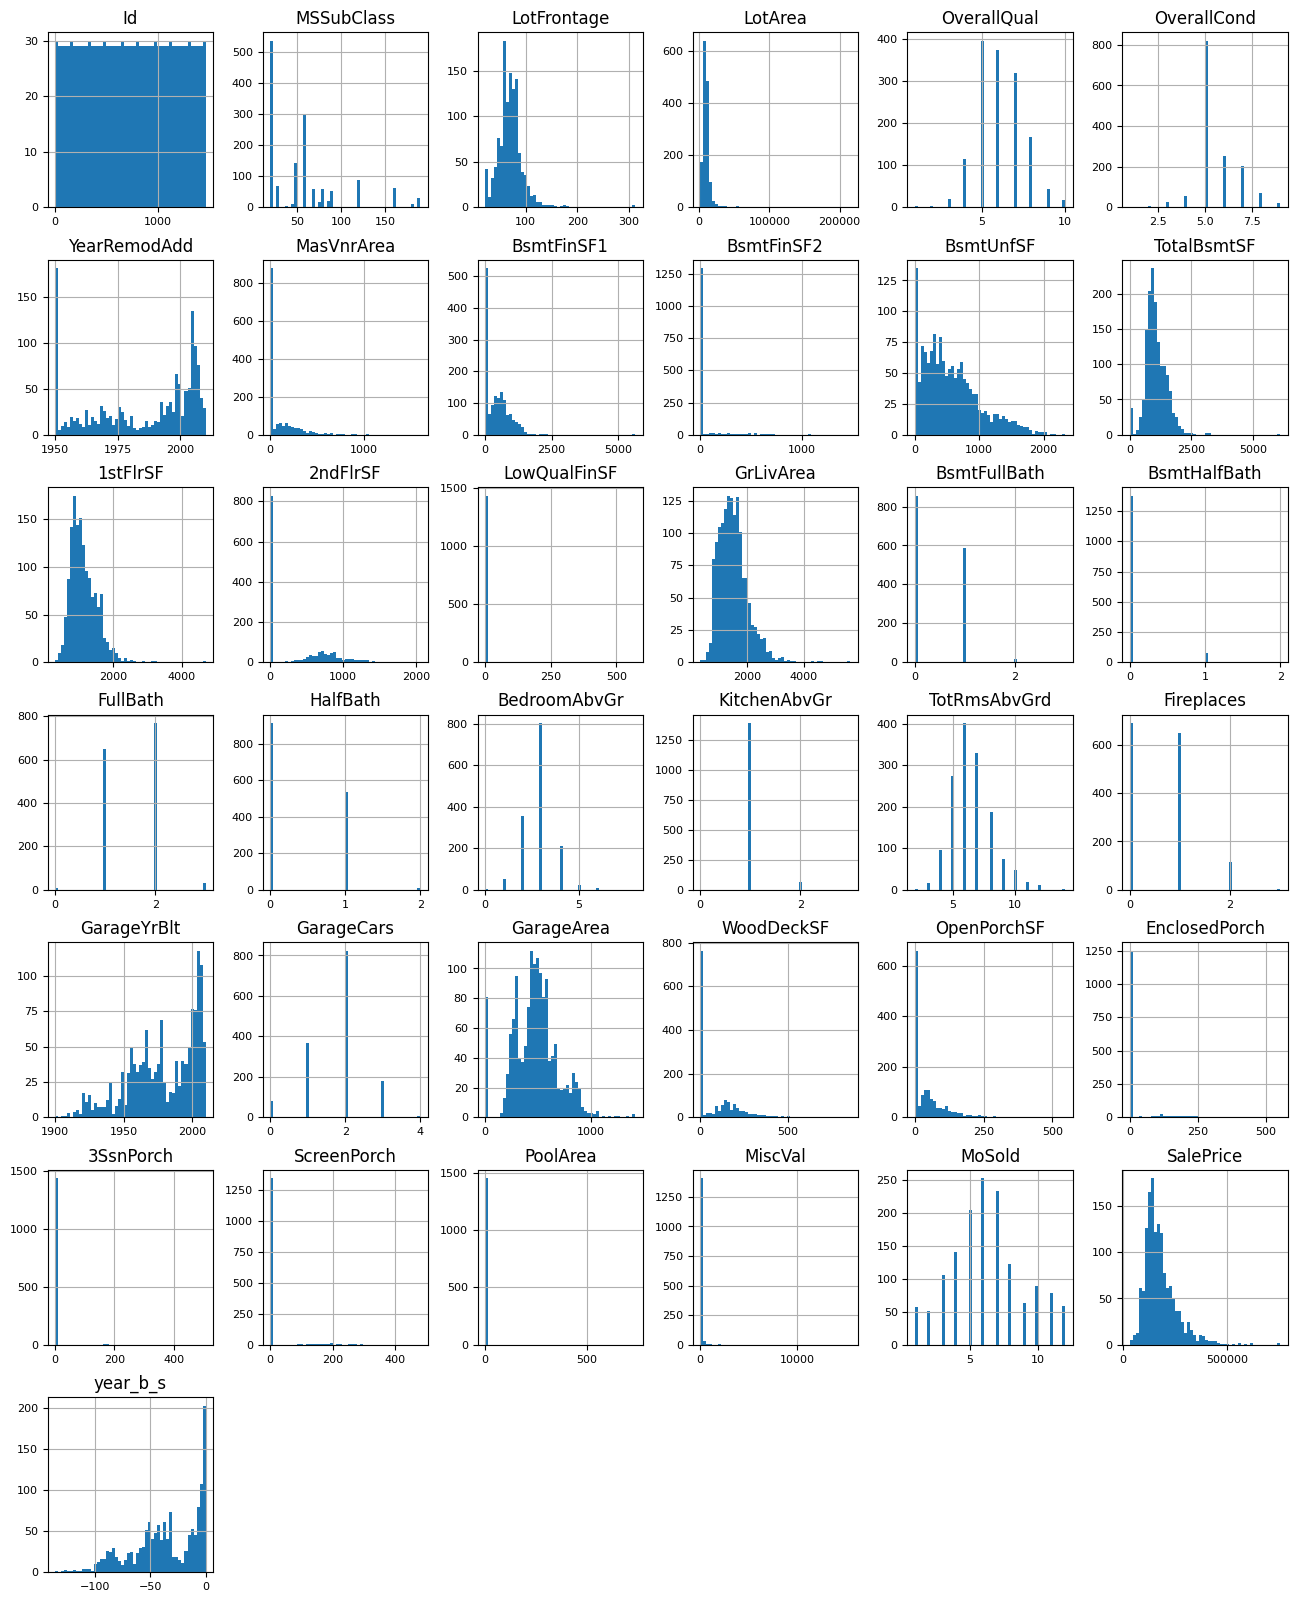

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
train_data.pop('Id')
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1016 examples in training, 444 examples in testing.


In [15]:
!pip install tensorflow_decision_forests

In [42]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd,
                                                 label=label,
                                                 task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)


In [43]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [44]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpv60d2tm0 as temporary training directory


In [45]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmptrw5rm63 as temporary training directory


In [46]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.026405. Found 1016 examples.
Training model...
Model trained in 0:00:03.050399
Compiling model...
Model compiled.


In [66]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=1, max_depth=3)

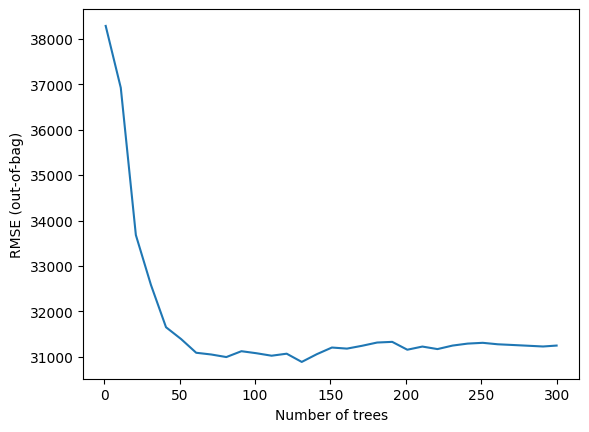

In [67]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [68]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1016, accuracy=None, loss=None, rmse=31249.205947031638, ndcg=None, aucs=None, auuc=None, qini=None)

In [50]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 472ms/step - loss: 0.0000e+00 - mse: 642125696.0000
loss: 0.0000
mse: 642125696.0000


In [51]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [52]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 118.0),
 ("ExterQual" (4; #22), 47.0),
 ("GarageCars" (1; #32), 29.0),
 ("Neighborhood" (4; #59), 25.0),
 ("TotalBsmtSF" (1; #73), 21.0),
 ("GrLivArea" (1; #38), 19.0),
 ("year_b_s" (1; #78), 13.0),
 ("1stFlrSF" (1; #0), 11.0),
 ("KitchenQual" (4; #44), 11.0),
 ("BsmtFinSF1" (1; #8), 2.0),
 ("BsmtQual" (4; #14), 2.0),
 ("GarageArea" (1; #31), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

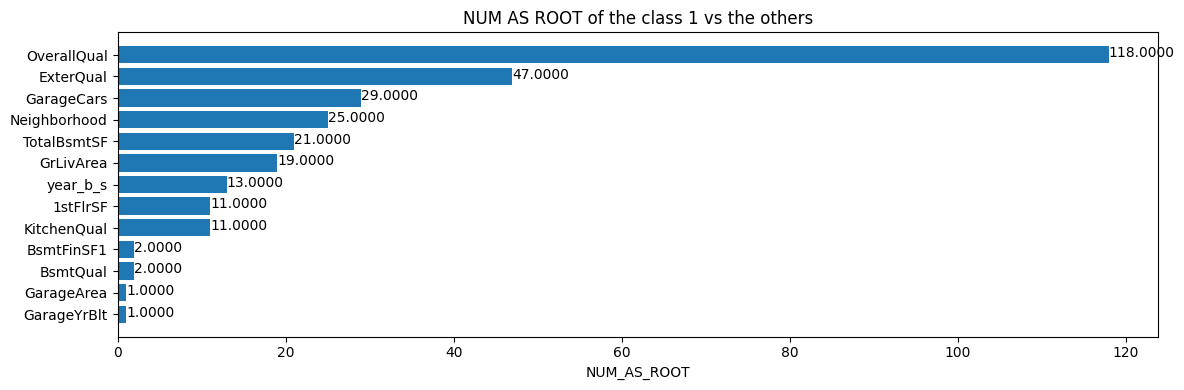

In [53]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [54]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1016, accuracy=None, loss=None, rmse=31249.205947031638, ndcg=None, aucs=None, auuc=None, qini=None)

In [55]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 506ms/step - loss: 0.0000e+00 - mse: 642125696.0000
loss: 0.0000
mse: 642125696.0000


In [56]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)

In [57]:
nan_attrebutes = ['PoolQC','Fence','MiscFeature','Alley','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu']
test_data[nan_attrebutes]=test_data[nan_attrebutes].fillna('No_found')

In [58]:
test_data['year_b_s'] = test_data['YearBuilt']-test_data['YrSold']

In [59]:
test_data = test_data.drop(columns=['YearBuilt','YrSold'])

In [62]:

ids = test_data.pop('Id')
# test_data = test_data[feature_names]

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

KeyError: ignored

In [63]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 1s 31ms/step


,Id,SalePrice
0,1461,124679.234375
1,1462,153135.890625
2,1463,182787.468750
3,1464,185162.187500
4,1465,186605.625000
